In [1]:
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import seaborn as sns

In [4]:
df= pd.read_csv("C:\\Users\\Sathya Sai\\Downloads\\customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
df["booking_complete"].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [6]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [8]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 18.6 

In [9]:
#data cleaning

In [10]:
df["flight_day"]=df["flight_day"].map({"Sat":6,"Wed":3,"Tue":2,"Mon":1,"Thu":4,"Fri":5,"Sun":7})

In [11]:
df["flight_day"].value_counts()

1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: flight_day, dtype: int64

In [12]:
df.isna().sum() #data is clean

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [13]:
df.select_dtypes(include=['object'])

,sales_channel,trip_type,route,booking_origin
0,Internet,RoundTrip,AKLDEL,New Zealand
1,Internet,RoundTrip,AKLDEL,New Zealand
2,Internet,RoundTrip,AKLDEL,India
3,Internet,RoundTrip,AKLDEL,New Zealand
4,Internet,RoundTrip,AKLDEL,India
...,...,...,...,...
49995,Internet,RoundTrip,PERPNH,Australia
49996,Internet,RoundTrip,PERPNH,Australia
49997,Internet,RoundTrip,PERPNH,Australia
49998,Internet,RoundTrip,PERPNH,Australia


In [14]:
df["sales_channel"].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [15]:
df[(df["sales_channel"]=="Mobile") & (df["booking_complete"]==0)]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
9,1,Mobile,RoundTrip,378,30,12,7,AKLDEL,India,0,0,0,5.52,0
45,1,Mobile,RoundTrip,221,61,2,7,AKLICN,New Zealand,0,0,0,6.62,0
78,1,Mobile,CircleTrip,281,18,3,3,AKLKTM,New Zealand,1,0,0,4.75,0
90,1,Mobile,RoundTrip,63,57,8,1,AKLKUL,New Zealand,0,0,0,8.83,0
100,1,Mobile,RoundTrip,57,21,1,7,AKLKUL,Malaysia,1,1,1,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49927,3,Mobile,RoundTrip,37,6,7,7,PENTPE,Malaysia,1,0,1,4.67,0
49939,1,Mobile,RoundTrip,216,6,10,4,PENTPE,Taiwan,1,0,0,4.67,0
49957,1,Mobile,RoundTrip,9,6,15,1,PENTPE,Malaysia,1,0,0,4.67,0
49958,4,Mobile,RoundTrip,108,6,16,1,PENTPE,Malaysia,1,0,1,4.67,0


 # majority of the internet users and Mobile users are not completing the booking.Incomplete bookings via internet------------>37513.  No. of total bookings via internet---->44382.Incomplete bookings via Mobile------------>5009.  No. of total bookings via internet---->5618.This can be a useful.

In [16]:
df["trip_type"].value_counts() # mojority are roundtrips

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

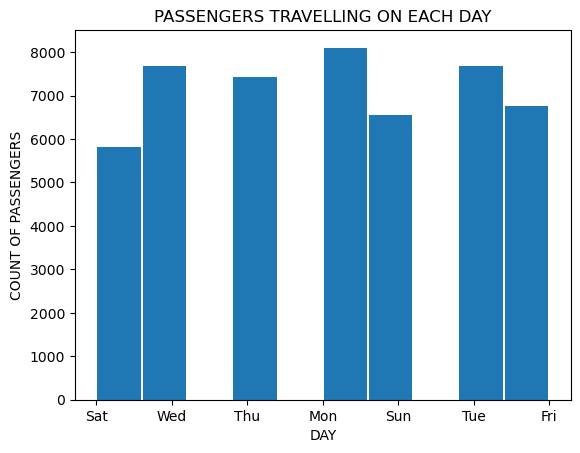

In [17]:
plt.hist(temp_d["flight_day"],rwidth=0.96)
plt.xlabel('DAY')
plt.ylabel('COUNT OF PASSENGERS')
plt.title('PASSENGERS TRAVELLING ON EACH DAY')
plt.show()

<Figure size 800x800 with 0 Axes>

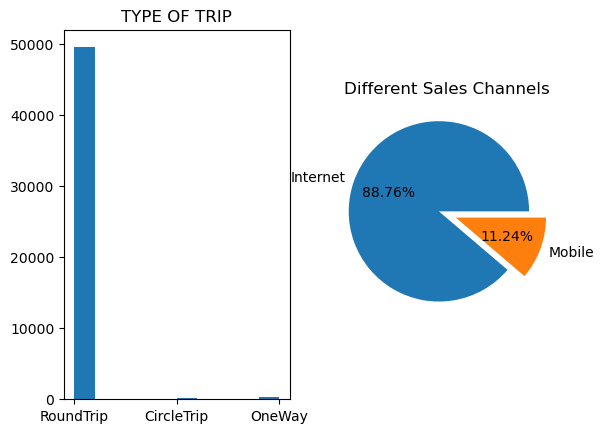

In [18]:
plt.figure(figsize=(8,8))
fig,ax=plt.subplots(1,2)
ax[0].hist(temp_d["trip_type"])
ax[0].set_title('TYPE OF TRIP')
ax[1].pie(temp_d["sales_channel"].value_counts(),labels=["Internet","Mobile"],autopct="%.2f%%",explode=[0.1,0.1])
ax[1].set_title('Different Sales Channels')
plt.show()

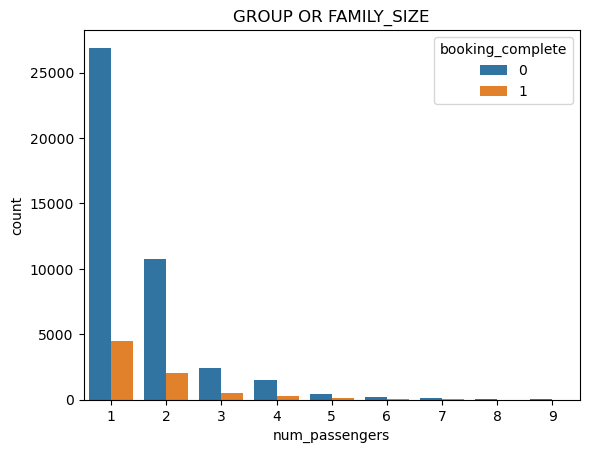

In [19]:
sns.countplot(x=temp_d["num_passengers"],data=temp_d,hue=temp_d["booking_complete"])
plt.title("GROUP OR FAMILY_SIZE")
plt.show()

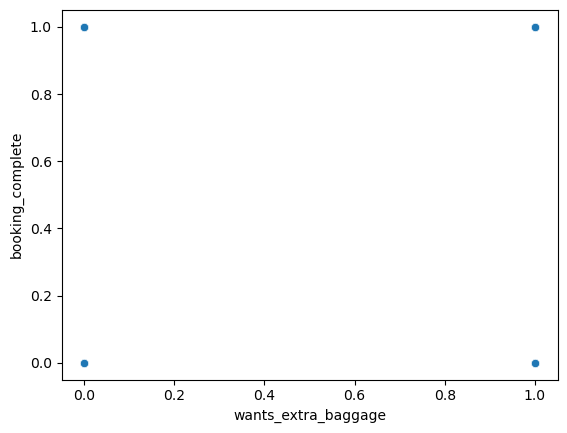

In [20]:
sns.scatterplot(x=temp_d["wants_extra_baggage"],y=temp_d["booking_complete"])
plt.show()

In [21]:
temp_d.agg(['mean','max','min','std','count'])

C:\Users\Sathya Sai\AppData\Local\Temp\ipykernel_19476\1859710500.py:1: FutureWarning: ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp_d.agg(['mean','max','min','std','count'])


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
mean,1.591240,NaN,NaN,84.940480,23.04456,9.06634,NaN,NaN,NaN,0.668780,0.296960,0.427140,7.277561,0.149560
max,9.000000,Mobile,RoundTrip,867.000000,778.00000,23.00000,Wed,URTXIY,Vietnam,1.000000,1.000000,1.000000,9.500000,1.000000
min,1.000000,Internet,CircleTrip,0.000000,0.00000,0.00000,Fri,AKLDEL,(not set),0.000000,0.000000,0.000000,4.670000,0.000000
std,1.020165,NaN,NaN,90.451378,33.88767,5.41266,NaN,NaN,NaN,0.470657,0.456923,0.494668,1.496863,0.356643
count,50000.000000,50000,50000,50000.000000,50000.00000,50000.00000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000


In [22]:
index_c=(temp_d["booking_origin"].value_counts()[temp_d["booking_origin"].value_counts()>5]).index#dele[dele["booking_origin"]=="others"]

In [23]:
index_c=index_c
for i in temp_d.index:
    if temp_d.loc[i,"booking_origin"] not in index_c:
        temp_d.loc[i,"booking_origin"]="others"
        
     #   print(temp_d.loc[i,"booking_origin"])
      #  temp_d.loc[i,"booking_origin"]="others"

In [24]:
temp_d[temp_d["booking_origin"]=="others"]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
183,1,Internet,RoundTrip,157,26,15,Mon,AKLKUL,others,1,0,1,8.83,0
199,1,Internet,RoundTrip,132,20,9,Mon,AKLKUL,others,1,0,0,8.83,0
206,2,Internet,RoundTrip,115,87,6,Wed,AKLKUL,others,0,0,0,8.83,0
446,1,Internet,RoundTrip,191,17,14,Wed,AKLKUL,others,0,0,0,8.83,0
555,1,Mobile,RoundTrip,155,24,23,Mon,AKLKUL,others,0,0,1,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46450,1,Internet,RoundTrip,38,6,22,Tue,HKTPER,others,1,1,1,5.62,0
46899,2,Internet,RoundTrip,166,6,23,Thu,HNDPEN,others,0,1,1,7.57,0
47328,3,Internet,RoundTrip,22,6,18,Sat,ICNPEN,others,1,1,0,6.62,0
47527,1,Internet,RoundTrip,27,6,2,Thu,ICNSIN,others,0,0,1,6.62,0


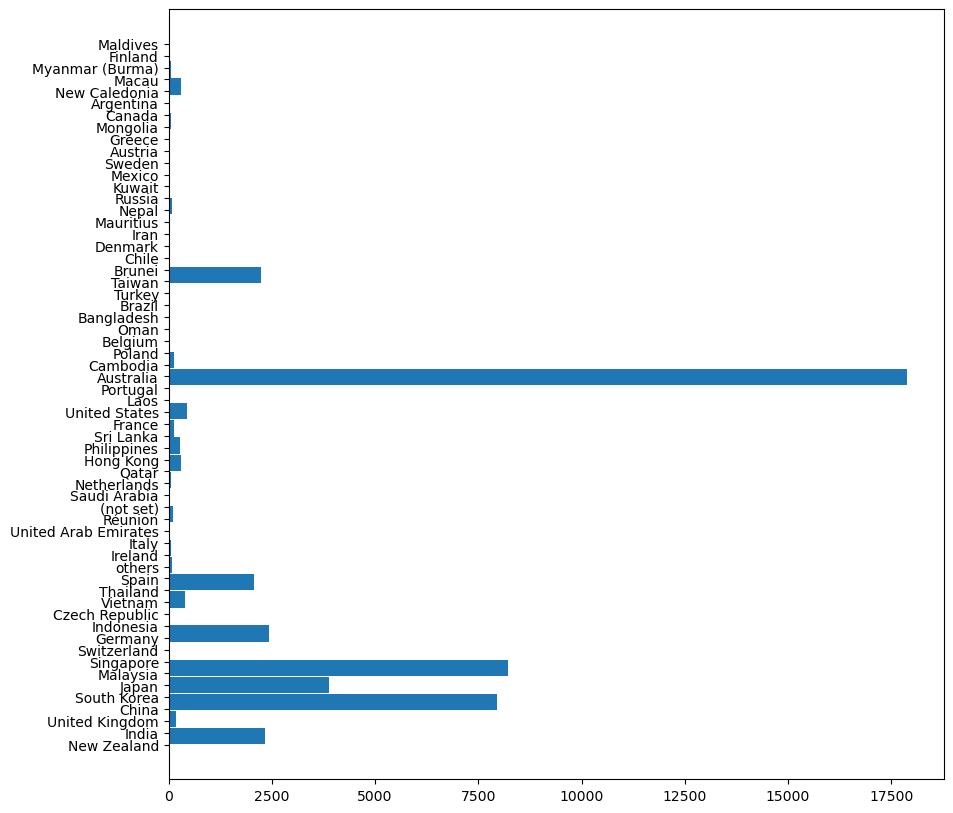

In [38]:
plt.figure(figsize=(10,10))
plt.hist(temp_d["booking_origin"],orientation='horizontal',bins=41,rwidth=0.95)
plt.show()

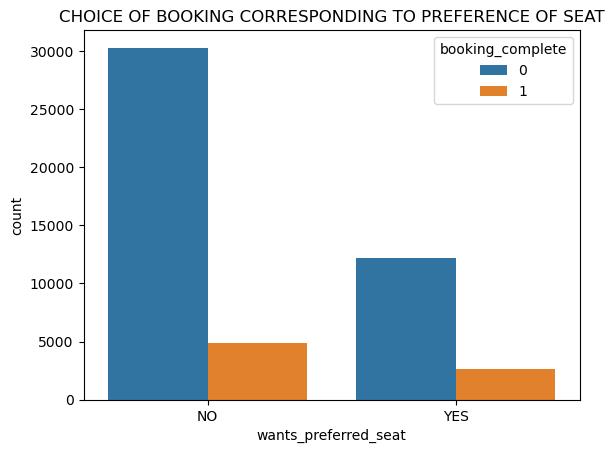

In [40]:
sns.countplot(x=temp_d["wants_preferred_seat"],hue=temp_d["booking_complete"])
plt.xticks([0,1],labels=["NO","YES"])
plt.title("CHOICE OF BOOKING CORRESPONDING TO PREFERENCE OF SEAT")
plt.show()

KeyError: ''

In [42]:
print("MEAN ={}".format(temp_d["length_of_stay"].mean()))
print("STD ={}".format(temp_d["length_of_stay"].std()))
print("upper limit ={}".format(temp_d["length_of_stay"].mean()+3*temp_d["length_of_stay"].std()))
print("lower limit ={}".format(temp_d["length_of_stay"].mean()-3*temp_d["length_of_stay"].std()))

MEAN =23.04456
STD =33.88767005694912
upper limit =124.70757017084736
lower limit =-78.61845017084735


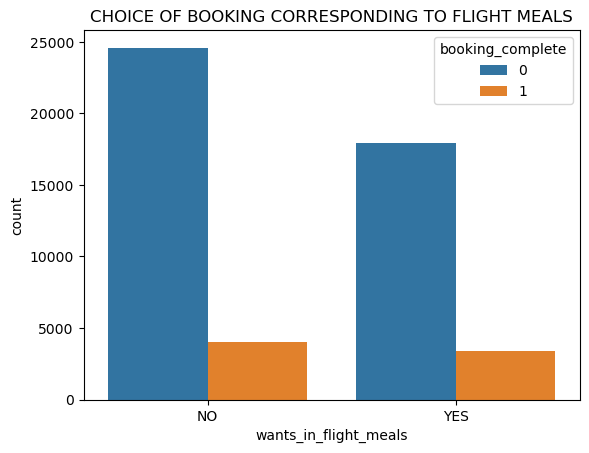

In [43]:
sns.countplot(x=temp_d["wants_in_flight_meals"],hue=temp_d["booking_complete"])
plt.xticks([0,1],labels=["NO","YES"])
plt.title("CHOICE OF BOOKING CORRESPONDING TO FLIGHT MEALS")
plt.show()

In [44]:
df["route"].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [45]:
df["booking_origin"].value_counts()

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

In [46]:
df.drop(['sales_channel','route','trip_type','booking_origin'],axis='columns',inplace=True) #HIGH VARIANCE YET THE SAME TIME UNUSEFUL THEREFORE REMOVE THOSE FEATURES

<AxesSubplot:>

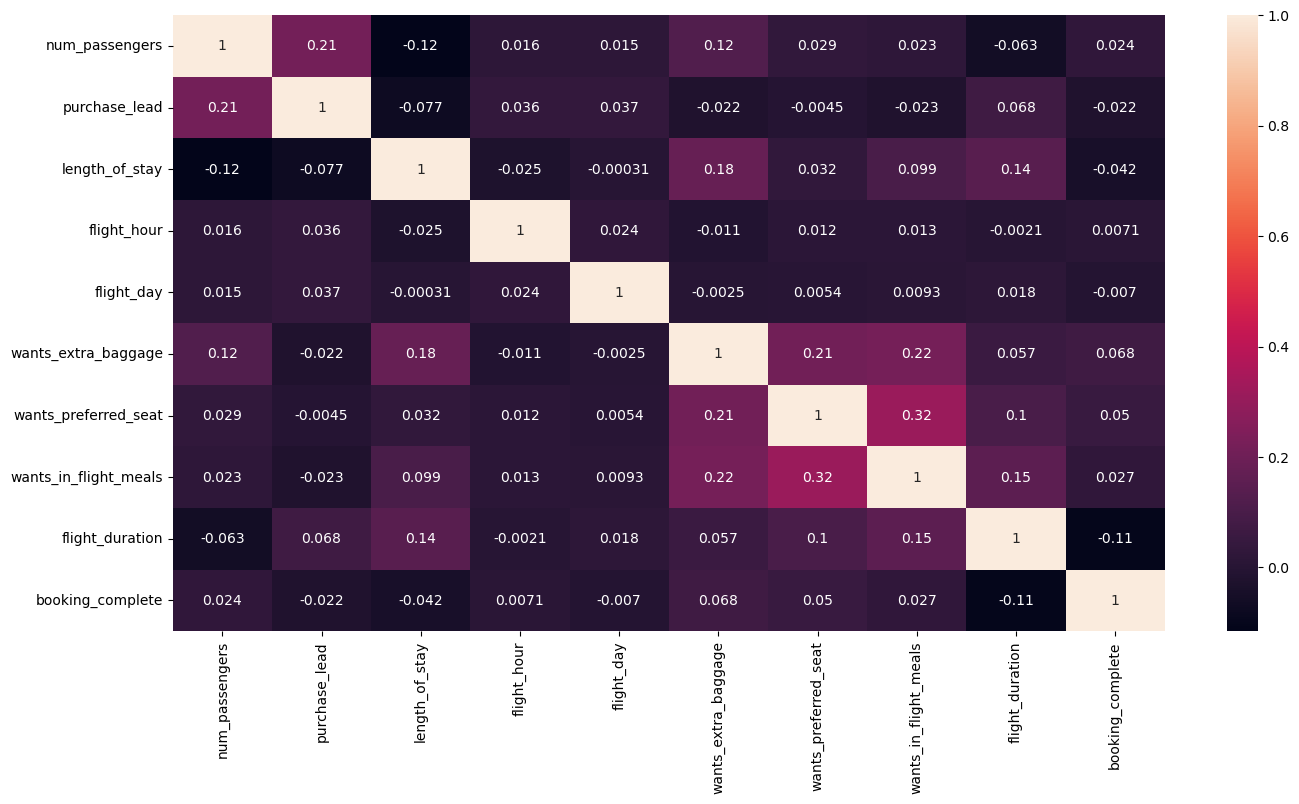

In [47]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

In [48]:
df.info(memory_usage='deep') #memory uasge reduced This speeds up the operations on dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   purchase_lead          50000 non-null  int64  
 2   length_of_stay         50000 non-null  int64  
 3   flight_hour            50000 non-null  int64  
 4   flight_day             50000 non-null  int64  
 5   wants_extra_baggage    50000 non-null  int64  
 6   wants_preferred_seat   50000 non-null  int64  
 7   wants_in_flight_meals  50000 non-null  int64  
 8   flight_duration        50000 non-null  float64
 9   booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 3.8 MB


In [49]:
from sklearn.feature_selection import SelectKBest, chi2

In [82]:
target=df["booking_complete"]

In [83]:
df.drop('booking_complete',axis=1,inplace=True)

In [89]:
x=SelectKBest(chi2,k=7)

In [90]:
a=x.fit(temp_d,target1)

In [91]:
features=x.get_feature_names_out()
features

array(['num_passengers', 'purchase_lead', 'length_of_stay',
       'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration'], dtype=object)

In [92]:
x.scores_

array([1.90188764e+01, 2.35867834e+03, 4.48096477e+03, 8.20732153e+00,
       2.54015689e+00, 7.68903474e+01, 8.82880897e+01, 2.01309616e+01,
       1.73831731e+02])

In [93]:
X=pd.DataFrame(x.transform(df),columns=features)

In [94]:
X

,num_passengers,purchase_lead,length_of_stay,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2.0,262.0,19.0,1.0,0.0,0.0,5.52
1,1.0,112.0,20.0,0.0,0.0,0.0,5.52
2,2.0,243.0,22.0,1.0,1.0,0.0,5.52
3,1.0,96.0,31.0,0.0,0.0,1.0,5.52
4,2.0,68.0,22.0,1.0,0.0,1.0,5.52
...,...,...,...,...,...,...,...
49995,2.0,27.0,6.0,1.0,0.0,1.0,5.62
49996,1.0,111.0,6.0,0.0,0.0,0.0,5.62
49997,1.0,24.0,6.0,0.0,0.0,1.0,5.62
49998,1.0,15.0,6.0,1.0,0.0,1.0,5.62


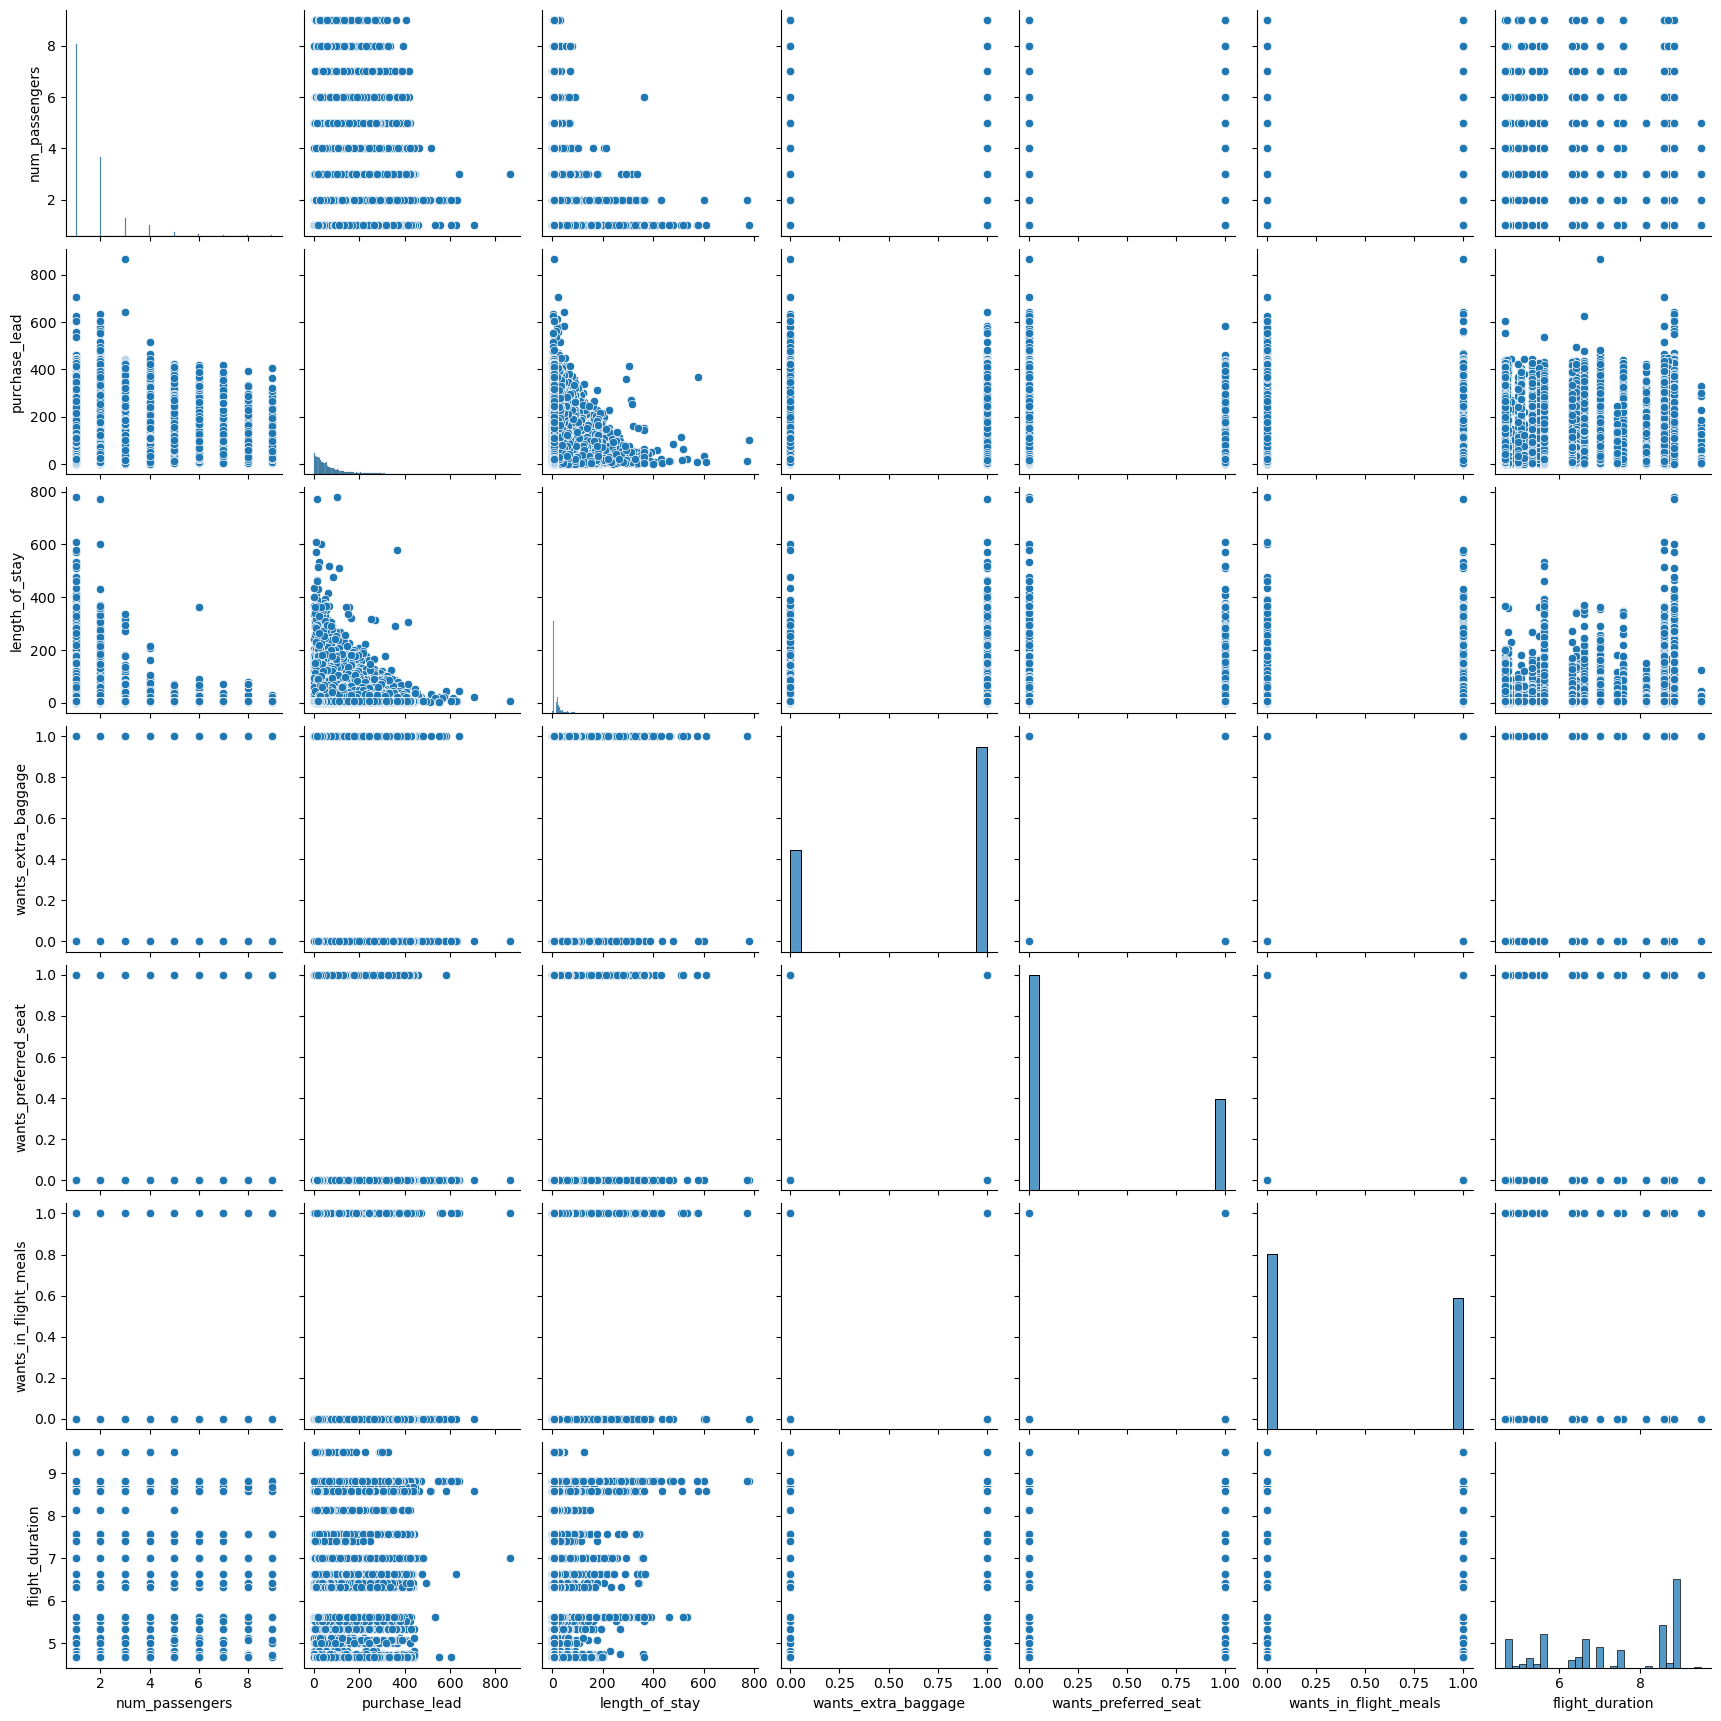

In [60]:
sns.pairplot(X)

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

In [95]:
from sklearn.model_selection import train_test_split 

In [99]:
train_x,test_x,train_y,test_y=train_test_split(X,target,test_size=0.2)#

In [154]:
def finding_best_model(train_x,train_y,test_x,test_y):
    Algorithms={
        'DecisionTree_classifier':{
            'model' : DecisionTreeClassifier(),
            'params' : {
                'criterion' :['gini', 'entropy'],
                'splitter' :['random','best'],
                'max_features':['auto','sqrt','log2']
            }
        },
        'XGB_classifier':
        {
            'model':GradientBoostingClassifier(),
            'params':{
                'loss':['exponential'],
                'criterion':['friedman_mse']     
            }
        },
        'RandomForest_Classifier':{
            'model':RandomForestClassifier(),
            'params':{
                'n_estimators':[100,125,150],
                'criterion':['gini','entropy'],
                'min_samples_split':[2,4]   
            }   
        },
        'KNeighbors_Classifier':{
            'model': KNeighborsClassifier(),
            'params':{
                'algorithm':['ball_tree', 'kd_tree','brute'],
                'n_neighbors':[3,5,7],
            }
        },
        'Gaussian_NB':{
            'model':GaussianNB(),
            'params':{}
        },
        'Bernouli_NB':{
            'model':BernoulliNB(),
            'params':{}
        },     
    }
    accuracy={}
    f1score={}
    recall={}
    precision={}
    roc_auc={}
    model={}
    for algo,parameter in Algorithms.items():
        gc=GridSearchCV(estimator=parameter['model'],param_grid=parameter['params'],cv=5)
        gc.fit(train_x,train_y)
        accuracy[algo]=gc.score(test_x,test_y)
        model[algo]=gc.best_params_
        f1score[algo]=f1_score(test_y,gc.predict(test_x))
        precision[algo]=precision_score(test_y,gc.predict(test_x))
        recall[algo]=recall_score(test_y,gc.predict(test_x))
        roc_auc[algo]=roc_auc_score(test_y,gc.predict(test_x))
        print(f"------{algo} confusion matrix--------------\n")
        print( confusion_matrix(test_y,gc.predict(test_x),labels=[0,1]))
        
    return accuracy,model,f1score,recall,precision,roc_auc
        

In [155]:
score_dict,model_dict,f1score_dict,recall_dict,precision_dict,roc_auc_dict=finding_best_model(train_x,train_y,test_x,test_y)

------DecisionTree_classifier confusion matrix--------------

[[7392 1119]
 [1148  341]]
------XGB_classifier confusion matrix--------------

[[8511    0]
 [1487    2]]
------RandomForest_Classifier confusion matrix--------------

[[8179  332]
 [1323  166]]


C:\Users\Sathya Sai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Sathya Sai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

------KNeighbors_Classifier confusion matrix--------------



C:\Users\Sathya Sai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[8323  188]
 [1424   65]]
------Gaussian_NB confusion matrix--------------

[[8440   71]
 [1480    9]]
------Bernouli_NB confusion matrix--------------

[[8511    0]
 [1489    0]]


C:\Users\Sathya Sai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
model_n=MultinomialNB()

In [108]:
model_n.fit(train_x,train_y)

MultinomialNB()

In [73]:
fi=model_n.predict(test_x)

In [76]:
model_n.score(test_x,test_y)

0.725

In [145]:
new_m=LogisticRegression(solver='saga')

In [146]:
new_m.fit(new_df,t_x)

LogisticRegression(solver='saga')

In [147]:
new_ans=new_m.predict(n_y)

In [148]:
new_m.score(n_y,t_y)

0.8532

In [169]:
print("-----------------------{}-----------\nAccuracy = {}\n".format('Logistic Regression',0.8532))
print(classification_report(new_ans,t_y,zero_division=False)) 

-----------------------Logistic Regression-----------
Accuracy = 0.8532

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     10000
           1       0.00      0.00      0.00         0

    accuracy                           0.85     10000
   macro avg       0.50      0.43      0.46     10000
weighted avg       1.00      0.85      0.92     10000



In [ ]:
score_dict,model_dict,f1score_dict,recall_dict,precision_dict,roc_auc_dict

In [184]:
m={}
m['precision']=precision_dict

In [185]:
precision_score=pd.DataFrame(m)

In [187]:
score,models,f1_score,recall_score,precision_score,roc_auc_score

(                         scores
 Bernouli_NB              0.8511
 DecisionTree_classifier  0.7733
 Gaussian_NB              0.8449
 KNeighbors_Classifier    0.8388
 RandomForest_Classifier  0.8345
 XGB_classifier           0.8513,
                                                            best parameters
 Bernouli_NB                                                             {}
 DecisionTree_classifier  {'criterion': 'entropy', 'max_features': 'auto...
 Gaussian_NB                                                             {}
 KNeighbors_Classifier             {'algorithm': 'brute', 'n_neighbors': 7}
 RandomForest_Classifier  {'criterion': 'gini', 'min_samples_split': 4, ...
 XGB_classifier           {'criterion': 'friedman_mse', 'loss': 'exponen...,
                          f1_scores
 Bernouli_NB               0.000000
 DecisionTree_classifier   0.231265
 Gaussian_NB               0.011472
 KNeighbors_Classifier     0.074627
 RandomForest_Classifier   0.167086
 XGB_classifier    

In [101]:
s=StandardScaler()

In [102]:
ad=s.fit_transform(n_x)
#h=GridSearchCV(estimator=SVC(),param_grid=params,cv=5)

In [103]:
new_df=pd.DataFrame(ad,columns=head)

In [77]:
head=ad.feature_names_in_

In [86]:
------DecisionTree_classifier confusion matrix--------------

[[7442 1098]
 [1125  335]]

------XGB_classifier confusion matrix--------------

[[8537    3]
 [1460    0]]

------RandomForest_Classifier confusion matrix--------------

[[8177  363]
 [1301  159]]

------KNeighbors_Classifier confusion matrix--------------
[[8400  140]
 [1406   54]]

------Gaussian_NB confusion matrix--------------

[[8475   65]
 [1449   11]]

------Bernouli_NB confusion matrix--------------

[[8540    0]
 [1460    0]]

------Logistic_Regression confusion matrix--------------

[[8540    0]
 [1460    0]]


0.8495

In [63]:
roc_auc_score

,roc_auc_score
Bernouli_NB,0.500000
DecisionTree_classifier,0.543044
Gaussian_NB,0.500916
KNeighbors_Classifier,0.512723
RandomForest_Classifier,0.528657
XGB_classifier,0.499824


In [68]:
score[score.scores==score.scores.max()] #best model according to accuracy.

,scores
Bernouli_NB,0.8516


In [ ]:
0.8216 ------>STANDARDSCALER + KNN
             precision    recall  f1-score   support

           0       0.96      0.85      0.90      9608
           1       0.03      0.10      0.04       392

    accuracy                           0.82     10000
   macro avg       0.49      0.47      0.47     10000
weighted avg       0.92      0.82      0.87     10000
#------------------------------------------------------------------------------------------------------
0.8532 --------->STANDARDSCALER + DECISIONTREE # DON'T AFFECT MUCH

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     10000
           1       0.00      0.00      0.00         0

    accuracy                           0.85     10000
   macro avg       0.50      0.43      0.46     10000
weighted avg       1.00      0.85      0.92     10000
#------------------------------------------------------------------------------------------------------
0.8532-------------->STANDARDSCALER + GAUSSIANNB()
             precision    recall  f1-score   support

           0       1.00      0.85      0.92     10000
           1       0.00      0.00      0.00         0

    accuracy                           0.85     10000
   macro avg       0.50      0.43      0.46     10000
weighted avg       1.00      0.85      0.92     10000

#------------------------------------------------------------------------------------------------------
0.8532---------->STANDARDSCALER + MULTINOMIALNB()
 precision    recall  f1-score   support

           0       1.00      0.85      0.92     10000
           1       0.00      0.00      0.00         0

    accuracy                           0.85     10000
   macro avg       0.50      0.43      0.46     10000
weighted avg       1.00      0.85      0.92     10000

#------------------------------------------------------------------------------------------------------
0.8529--------->STANDARDSCALER + RandomForestClassifier(min_samples_split=4, n_estimators=150) # DON'T AFFECT MUCH
     precision    recall  f1-score   support

           0       1.00      0.85      0.92      9989
           1       0.00      0.36      0.01        11

    accuracy                           0.85     10000
   macro avg       0.50      0.61      0.46     10000
weighted avg       1.00      0.85      0.92     10000

#------------------------------------------------------------------------------------------------------
0.8532--------->STANDARDSCALER + LogisticRegression(solver='saga')
        precision    recall  f1-score   support

           0       1.00      0.85      0.92     10000
           1       0.00      0.00      0.00         0

    accuracy                           0.85     10000
   macro avg       0.50      0.43      0.46     10000
weighted avg       1.00      0.85      0.92     10000

In [105]:
models.values

array([[{}],
       [{'criterion': 'gini', 'max_features': 'log2', 'splitter': 'random'}],
       [{}],
       [{'algorithm': 'brute', 'n_neighbors': 7}],
       [{'criterion': 'gini', 'min_samples_split': 4, 'n_estimators': 150}],
       [{'criterion': 'friedman_mse', 'loss': 'exponential'}]],
      dtype=object)

# CLASSIFICATION REPORT OF EACH ALGORITHM

In [157]:
print("----------"+str(mod)+"---------\n")
print(classification_report(test_y,fi,zero_division=0))

----------MultinomialNB()---------

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      8516
           1       0.17      0.23      0.20      1484

    accuracy                           0.73     10000
   macro avg       0.52      0.52      0.52     10000
weighted avg       0.76      0.72      0.74     10000



In [156]:
print("----------"+str(g)+"---------\n")
print(classification_report(test_y,ans,zero_division=0))

----------RandomForestClassifier(min_samples_split=4, n_estimators=150)---------

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      8516
           1       0.28      0.10      0.14      1484

    accuracy                           0.83     10000
   macro avg       0.57      0.53      0.52     10000
weighted avg       0.77      0.83      0.79     10000



In [150]:
print("----------"+str(g)+"---------\n")
print(classification_report(test_y,ans,zero_division=0))

----------GradientBoostingClassifier(loss='exponential')---------

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8516
           1       0.00      0.00      0.00      1484

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.73      0.85      0.78     10000



In [143]:
print("----------"+str(g)+"---------\n")
print(classification_report(test_y,ans,zero_division=0))

----------DecisionTreeClassifier(max_features='log2', splitter='random')---------

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      8516
           1       0.21      0.20      0.21      1484

    accuracy                           0.77     10000
   macro avg       0.54      0.54      0.54     10000
weighted avg       0.77      0.77      0.77     10000



In [135]:
print("----------"+str(g)+"---------\n")
print(classification_report(test_y,ans,zero_division=0))
        precision    recall  f1-score   support


----------LogisticRegression(solver='saga')---------

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8516
           1       0.00      0.00      0.00      1484

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.73      0.85      0.78     10000



In [113]:
print("----------"+str(g)+"---------\n")
print(classification_report(test_y,ans,zero_division=0))

----------KNeighborsClassifier()---------

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      8516
           1       0.26      0.07      0.11      1484

    accuracy                           0.83     10000
   macro avg       0.56      0.52      0.51     10000
weighted avg       0.77      0.83      0.79     10000



In [99]:
print("----------"+str(g)+"---------\n")
print(classification_report(test_y,ans,zero_division=0))

----------GaussianNB()---------

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      8516
           1       0.18      0.01      0.02      1484

    accuracy                           0.85     10000
   macro avg       0.52      0.50      0.47     10000
weighted avg       0.75      0.85      0.78     10000



In [94]:
print("----------"+str(g)+"---------\n")
print(classification_report(test_y,ans,zero_division=0))

----------BernoulliNB()---------

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8516
           1       0.00      0.00      0.00      1484

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.73      0.85      0.78     10000



# BEST MODEL ARE MULTINOMIAL NAIVE BAYES,

# KNeighborsClassifier(),

# DecisionTreeClassifier(max_features='log2', splitter='random'),

# RandomForestClassifier(min_samples_split=4, n_estimators=150).

# BUT  TO  REDUCE  COMPUTATION  WE  CAN  CHOOSE   MULTINOMIAL NAIVE  BAYES  (AS  KNN  CLASSIFIER   IS  A  SLOW  LEARNER).